# Indicators of Heavy Traffic on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway, as measured by a traffic station between Minneapolis and Saint Paul.

The goal of our analysis is to determine a few indicators of heavy traffic (westbound, i.e traffic going from east to west) on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## I-94 Dataset
John Hogue made the dataset available that we'll be working with, and you can download it from the [UCI Machine Learning Repository] (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [1]:
import pandas as pd
traffic_I94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(traffic_I94[:5])
print(traffic_I94[-5:])
print(traffic_I94.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

We will be using Matplotlib to explore the data. In order to add graph visualizations in jupyter notebook we will need to add the below code:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Analyzing Traffic Volume

Let us plot the histogram of traffic_volume values and study the distribution of the values.

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

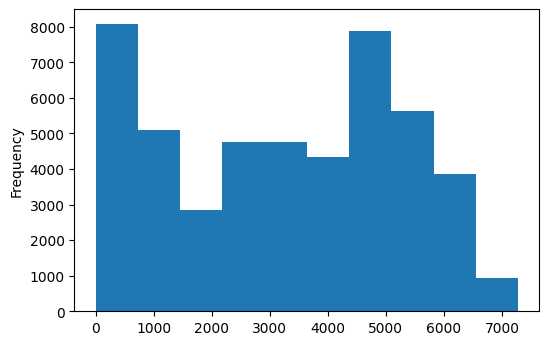

In [3]:
traffic_I94["traffic_volume"].plot.hist()
traffic_I94["traffic_volume"].describe()

The histogram above shows a non-symettrical distribution of values, with min traffic volume 0 and max traffic volume equal to 7280.

There are two intervals showing the highest frequencies 0-500 and 4500-5000. There is a 25% chance that the traffic volume will be more than 4933 or in the interval of \[4933,7280\]

Also 25% of the time, the traffic volume is 1193 or lower, i.e there are 1,193 cars passing through the station which recorded the data.

Both the above intervals might be because of daytime or nighttime traffic. We will need data to confirm our hypothesis.

Let us divide our dataset into daytime (7 am to 7 pm) and nighttime (7 pm to 7 am) traffic data, but before that we will need to convert the date_time column into datetime dtype.

## Traffic Volume: Day vs. Night

In [4]:
traffic_I94["date_time"] = pd.to_datetime(traffic_I94["date_time"])
traffic_I94_day = traffic_I94[(traffic_I94["date_time"].dt.hour >= 7) & (traffic_I94["date_time"].dt.hour <= 18)]
traffic_I94_night = traffic_I94[(traffic_I94["date_time"].dt.hour >= 19) | (traffic_I94["date_time"].dt.hour <= 6)]

print(traffic_I94_day.shape)
print(traffic_I94_night.shape)

(23877, 9)
(24327, 9)


Now let us plot histograms for traffic volume during day and night, plotted side-by-side.

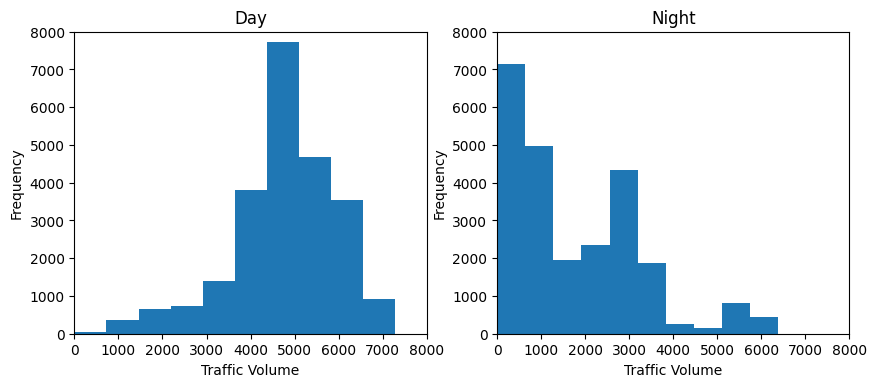

In [5]:
plt.figure(figsize=(10,4))
# Day Plot
plt.subplot(1,2,1)
plt.hist(traffic_I94_day["traffic_volume"])
plt.title("Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0,8000])
plt.ylim([0,8000])

# Night Plot
plt.subplot(1,2,2)
plt.hist(traffic_I94_night["traffic_volume"])
plt.title("Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.show()

We can see that night time rarely generates heavy traffic, while daytime has significant peaks for traffic volumes in the interval of 4000,6500.

Let us see some statistics for traffic volumes for the two dataframes which we created above.

In [6]:
print(traffic_I94_day["traffic_volume"].describe())
print(traffic_I94_night["traffic_volume"].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


Since, we are interested in finding the heavt traffic indicators only and because the nighttime rarely produces heavy traffic (as seen above), we will focus on daytime data only moving forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

<ipython-input-9-b5a4f95d7fc9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



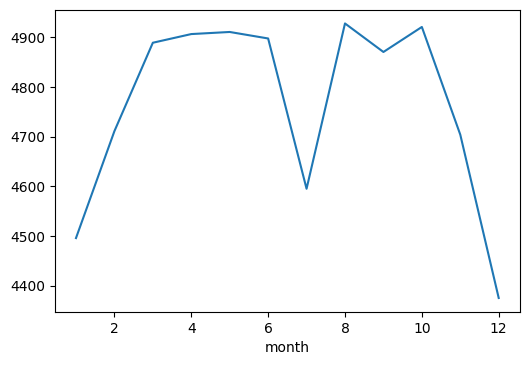

In [9]:
traffic_I94_day['month'] = traffic_I94_day['date_time'].dt.month
by_month = traffic_I94_day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The traffic seems lower during Nov-Feb (cold months) and higher during Mar-Oct (warm months). There is one exception to this: July. Generally the traffic should be consistently high during all the warm months. Let us see the traffic volume distribution for July across all the years.

<ipython-input-17-972f5fd0284c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



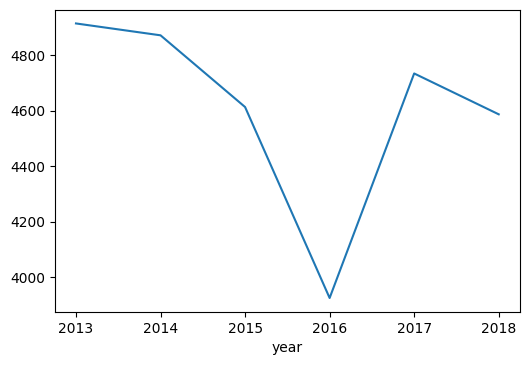

In [17]:
traffic_I94_day["year"] = traffic_I94_day["date_time"].dt.year
traffic_I94_day_Jul = traffic_I94_day[traffic_I94_day["month"] == 7]
traffic_I94_day_Jul.groupby("year").mean()["traffic_volume"].plot.line()
plt.show()

We can see there is a dip in traffic volume for Jul, 2016, this might be due to some construction activity.

Now let us build line plot for another time unit: day of the week.

<ipython-input-20-5d289af1b8f2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



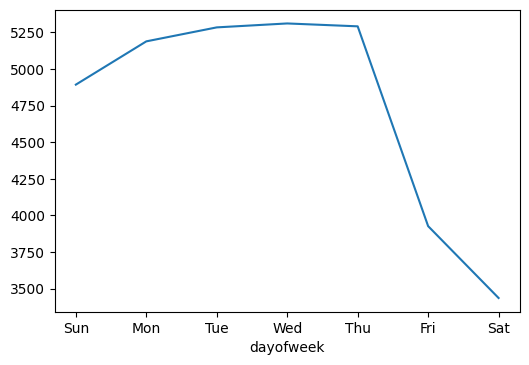

In [20]:
traffic_I94_day["dayofweek"] = traffic_I94_day["date_time"].dt.dayofweek
traffic_I94_day.groupby("dayofweek").mean()["traffic_volume"].plot.line()
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

Now we will generate line plot for the time of the day. The weekends will drag down the averages, so we are going to look at the averages separately. We will split the data on the day type: business day or weekend.

In [21]:
traffic_I94_day['hour'] = traffic_I94_day['date_time'].dt.hour
bussiness_days = traffic_I94_day.copy()[traffic_I94_day['dayofweek'] <= 4] # 4 == Friday
weekend = traffic_I94_day.copy()[traffic_I94_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-21-6a420a90715c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



To help us compare the two line plots better, we will plot these using grid charts.

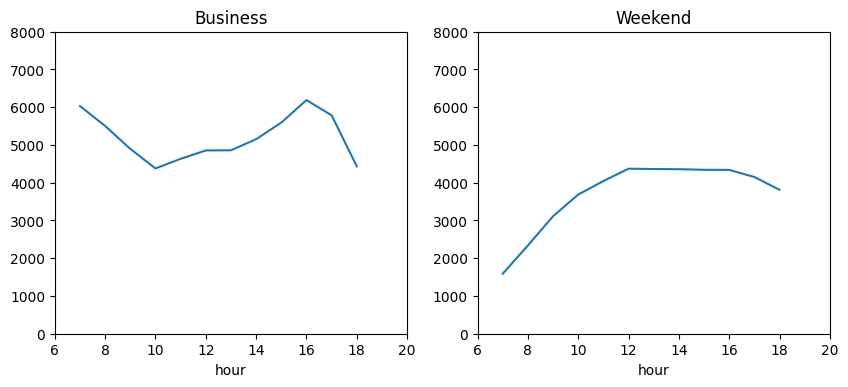

In [22]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
by_hour_business["traffic_volume"].plot.line()
plt.title("Business")
plt.xlim([6,20])
plt.ylim([0,8000])

plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Weekend")
plt.xlim([6,20])
plt.ylim([0,8000])

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [36]:
traffic_I94_day.corr().loc["temp":"clouds_all", "traffic_volume"]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

The temp column has the strongest correlation with traffic volume - 0.128317.
Let us plot a scatter plot of temp vs traffic_volume.

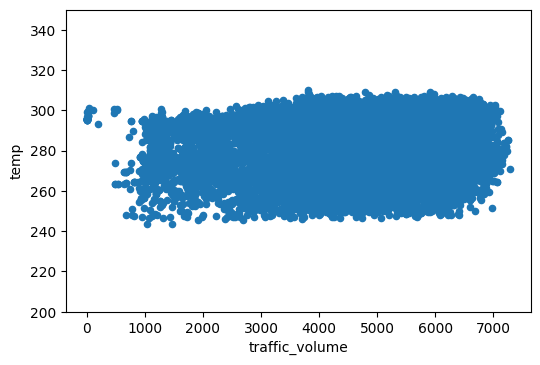

In [41]:
traffic_I94_day.plot.scatter(x='traffic_volume',y='temp')
plt.ylim(200,350)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

We're going to calculate the average traffic volume associated with each unique value in these two columns. We've already calculated the values for you — we grouped the data by weather_main and weather_description while using the mean as an aggregate function.

In [43]:
by_weather_main = traffic_I94_day.groupby('weather_main').mean()
by_weather_description = traffic_I94_day.groupby('weather_description').mean()

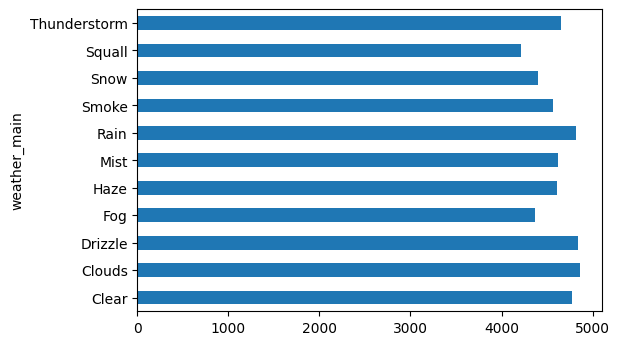

In [45]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

Again we are not seeing any significant traffic indicators. Let us plot a horizontal bar plot for weather_description.

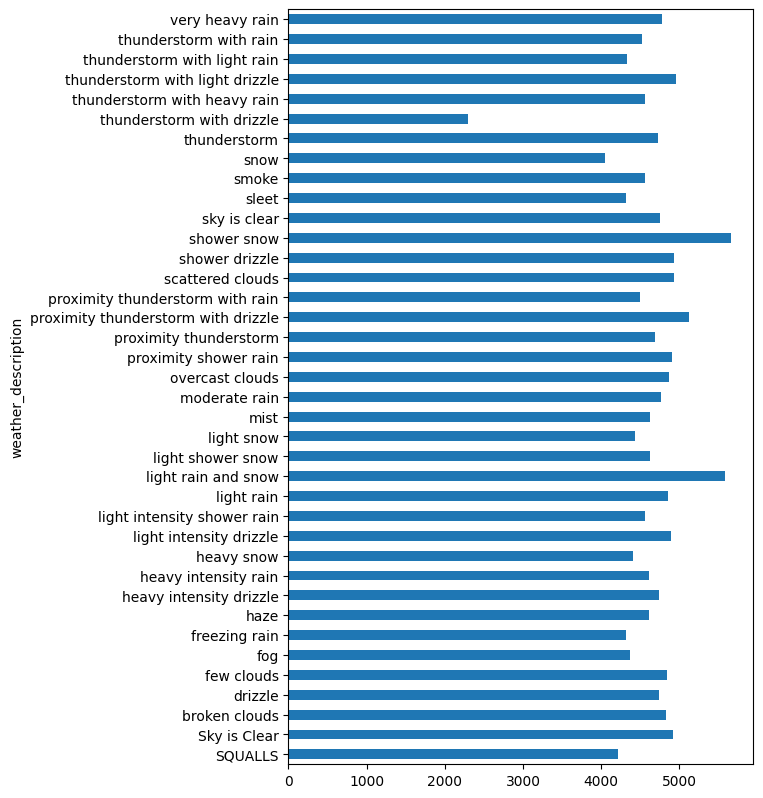

In [50]:
by_weather_description["traffic_volume"].plot.barh(figsize=(6,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle